# Unit 4 Project - Model Building 

# Part 1 - Learn Linear Regression Theory

### Step 1: Describe Linear Regression Models 

Answer the following questions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- In your own words, briefly describe a simple linear regression model.
- What type of machine learning is linear regression?
- What is a “line of best fit” using the OLS method?
- What is the difference between correlation and regression?
- Describe a scenario when you would use linear regression and why you would use it. 


In [1]:
# 1. Model where only one independent variable is present and model has to find linear relationship of it with dependent variable.
# 2. Supervised Machine Learning
# 3. Straight line that minimizes distance between it and data.
# 4. Correlation finds the strength of the relationship of two variables, while regression expresses the relationship in an equation.
# 5. To see how education level affects salary (two variable's relationship to one another.)

### Step 2: Describe Linear Regression Assumptions 

In your own words, describe the following linear regression assumptions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Linearity
- Normality
- Homoscedasticity
- No multicollinearity
- No endogeneity
- No autocorrelation

In [2]:
# 1. States that the dependent variable should be linearly related to independent variables.
# 2. States that the x and y variables should be normally distributed.
# 3. States that the variance of error terms should be constant.
# 4. States that variables should be independent of each other.
# 5. When explanatory variable is not correlated with error term.
# 6. Error terms should be independent of each other.

### Step 3: Describe How to Interpret Results from Correlation Table in Model Summary 

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Coefficient of Constant / Intercept (b0)
- Coefficient of Independent Variable (B1)
- Standard Error
- T-Statistic
- P-Value of T-Statistic (from the independent variable)


In [3]:
# 1. Value where regression line crosses y axis.
# 2. Represents mean change of independent variable.
# 3. Measures accuracy in which a sample represents entire model using standard deviation.
# 4. Ratio of departure of the estimated value of a paramater from its hypothesized value.
# 5. Level of marginal significane of t statistic from independent variable.

### Step 4:  Explain R-Squared and adjusted R-squared

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- R-squared
- Adjusted R-squared


In [4]:
# 1. Coefficient of determination which indicates the percentage of the variablility of the data explained by the selected independent variables.
# 2. Corrected goodness of fit measure for linear models.

# Part 2 - Linear Regression in Practice

### Step 1: Import libraries and load dataset

In [5]:
# make necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [6]:
# load data
df = pd.read_csv('house_data.csv')
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  2014-10-13  221900.0         3       1.00         1180   
1  6414100192  2014-12-09  538000.0         3       2.25         2570   
2  5631500400  2015-02-25  180000.0         2       1.00          770   
3  2487200875  2014-12-09  604000.0         4       3.00         1960   
4  1954400510  2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  house_condition  grade  sqft_above  \
0    5650.0     1.0           0     1                3    7.0      1180.0   
1    7242.0     2.0           0     1                3    7.0      2170.0   
2   10000.0     1.0           0     1                3    6.0       770.0   
3    5000.0     1.0           0     1                5    7.0      1050.0   
4    8080.0     1.0           0     1                3    8.0      1680.0   

   sqft_basement  year_built  zipcode      lat     long  sqft_living_15  
0              0      1955.0  98178.0  47.5112 -122.257            1340  
1            400      1951.0  98125.0  47.7210 -122.319            1690  
2              0      1933.0  98028.0  47.7379 -122.233            2720  
3            910      1965.0  98136.0  47.5208 -122.393            1360  
4              0      1987.0  98074.0  47.6168 -122.045            1800

### Step 2: Explore the data 

#### Spend time exploring the data and looking for relationships between variables. 

In [7]:
# explore data below (you will need to make new cells)

In [8]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.045600e+04  2.045600e+04  20456.000000  20456.000000  20456.000000   
mean   4.634802e+09  4.863355e+05      3.310422      2.032062   1942.120258   
std    2.877504e+09  2.398423e+05      0.855849      0.689049    724.345438   
min    1.000102e+06  3.209000e+03      1.000000      0.000000    370.000000   
25%    2.161850e+09  3.120000e+05      3.000000      1.500000   1390.000000   
50%    3.992700e+09  4.350000e+05      3.000000      2.000000   1840.000000   
75%    7.387500e+09  6.020000e+05      4.000000      2.500000   2410.000000   
max    9.900000e+09  1.640000e+06      6.000000      4.250000   4600.000000   

            sqft_lot        floors    waterfront          view  \
count   20456.000000  20456.000000  20456.000000  20456.000000   
mean    10302.509875      1.473455      0.004155      1.179165   
std     12700.282036      0.537955      0.064329      0.661116   
min       520.000000      1.000000      0.000000      1.000000   
25%      5000.000000      1.000000      0.000000      1.000000   
50%      7412.000000      1.000000      0.000000      1.000000   
75%     10022.250000      2.000000      0.000000      1.000000   
max    133729.000000      3.500000      1.000000      5.000000   

       house_condition         grade    sqft_above  sqft_basement  \
count     20456.000000  20456.000000  20456.000000   20456.000000   
mean          3.411322      7.514241   1679.184542     262.887808   
std           0.652286      1.026879    683.115368     390.859372   
min           1.000000      3.000000    300.000000       0.000000   
25%           3.000000      7.000000   1170.000000       0.000000   
50%           3.000000      7.000000   1500.000000       0.000000   
75%           4.000000      8.000000   2080.000000     520.000000   
max           5.000000     12.000000   3960.000000    1540.000000   

         year_built       zipcode           lat          long  sqft_living_15  
count  20456.000000  20452.000000  20456.000000  20456.000000    20456.000000  
mean    1969.985041  95297.064395     47.559194   -122.219543     1902.208594  
std       29.355600  15428.241686      0.139330      0.138576      585.143495  
min     1900.000000   9801.000000     47.155900   -122.512000      399.000000  
25%     1950.750000  98032.000000     47.467200   -122.332000     1460.000000  
50%     1972.000000  98072.000000     47.569650   -122.244500     1790.000000  
75%     1995.000000  98118.000000     47.679400   -122.134000     2260.000000  
max     2050.000000  98199.000000     47.777600   -121.315000     3790.000000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20456 entries, 0 to 20455
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20456 non-null  int64  
 1   date             20456 non-null  object 
 2   price            20456 non-null  float64
 3   bedrooms         20456 non-null  int64  
 4   bathrooms        20456 non-null  float64
 5   sqft_living      20456 non-null  int64  
 6   sqft_lot         20456 non-null  float64
 7   floors           20456 non-null  float64
 8   waterfront       20456 non-null  int64  
 9   view             20456 non-null  int64  
 10  house_condition  20456 non-null  int64  
 11  grade            20456 non-null  float64
 12  sqft_above       20456 non-null  float64
 13  sqft_basement    20456 non-null  int64  
 14  year_built       20456 non-null  float64
 15  zipcode          20452 non-null  float64
 16  lat              20456 non-null  float64
 17  long        

In [10]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [11]:
pearsonr(df['price'], df['sqft_lot'])

(0.06720644465450432, 6.427598908117148e-22)

In [12]:
spearmanr(df['price'], df['year_built'])

SpearmanrResult(correlation=0.07074758884129383, pvalue=4.036927470076054e-24)

In [13]:
spearmanr(df['price'], df['grade'])

SpearmanrResult(correlation=0.6113822459401423, pvalue=0.0)

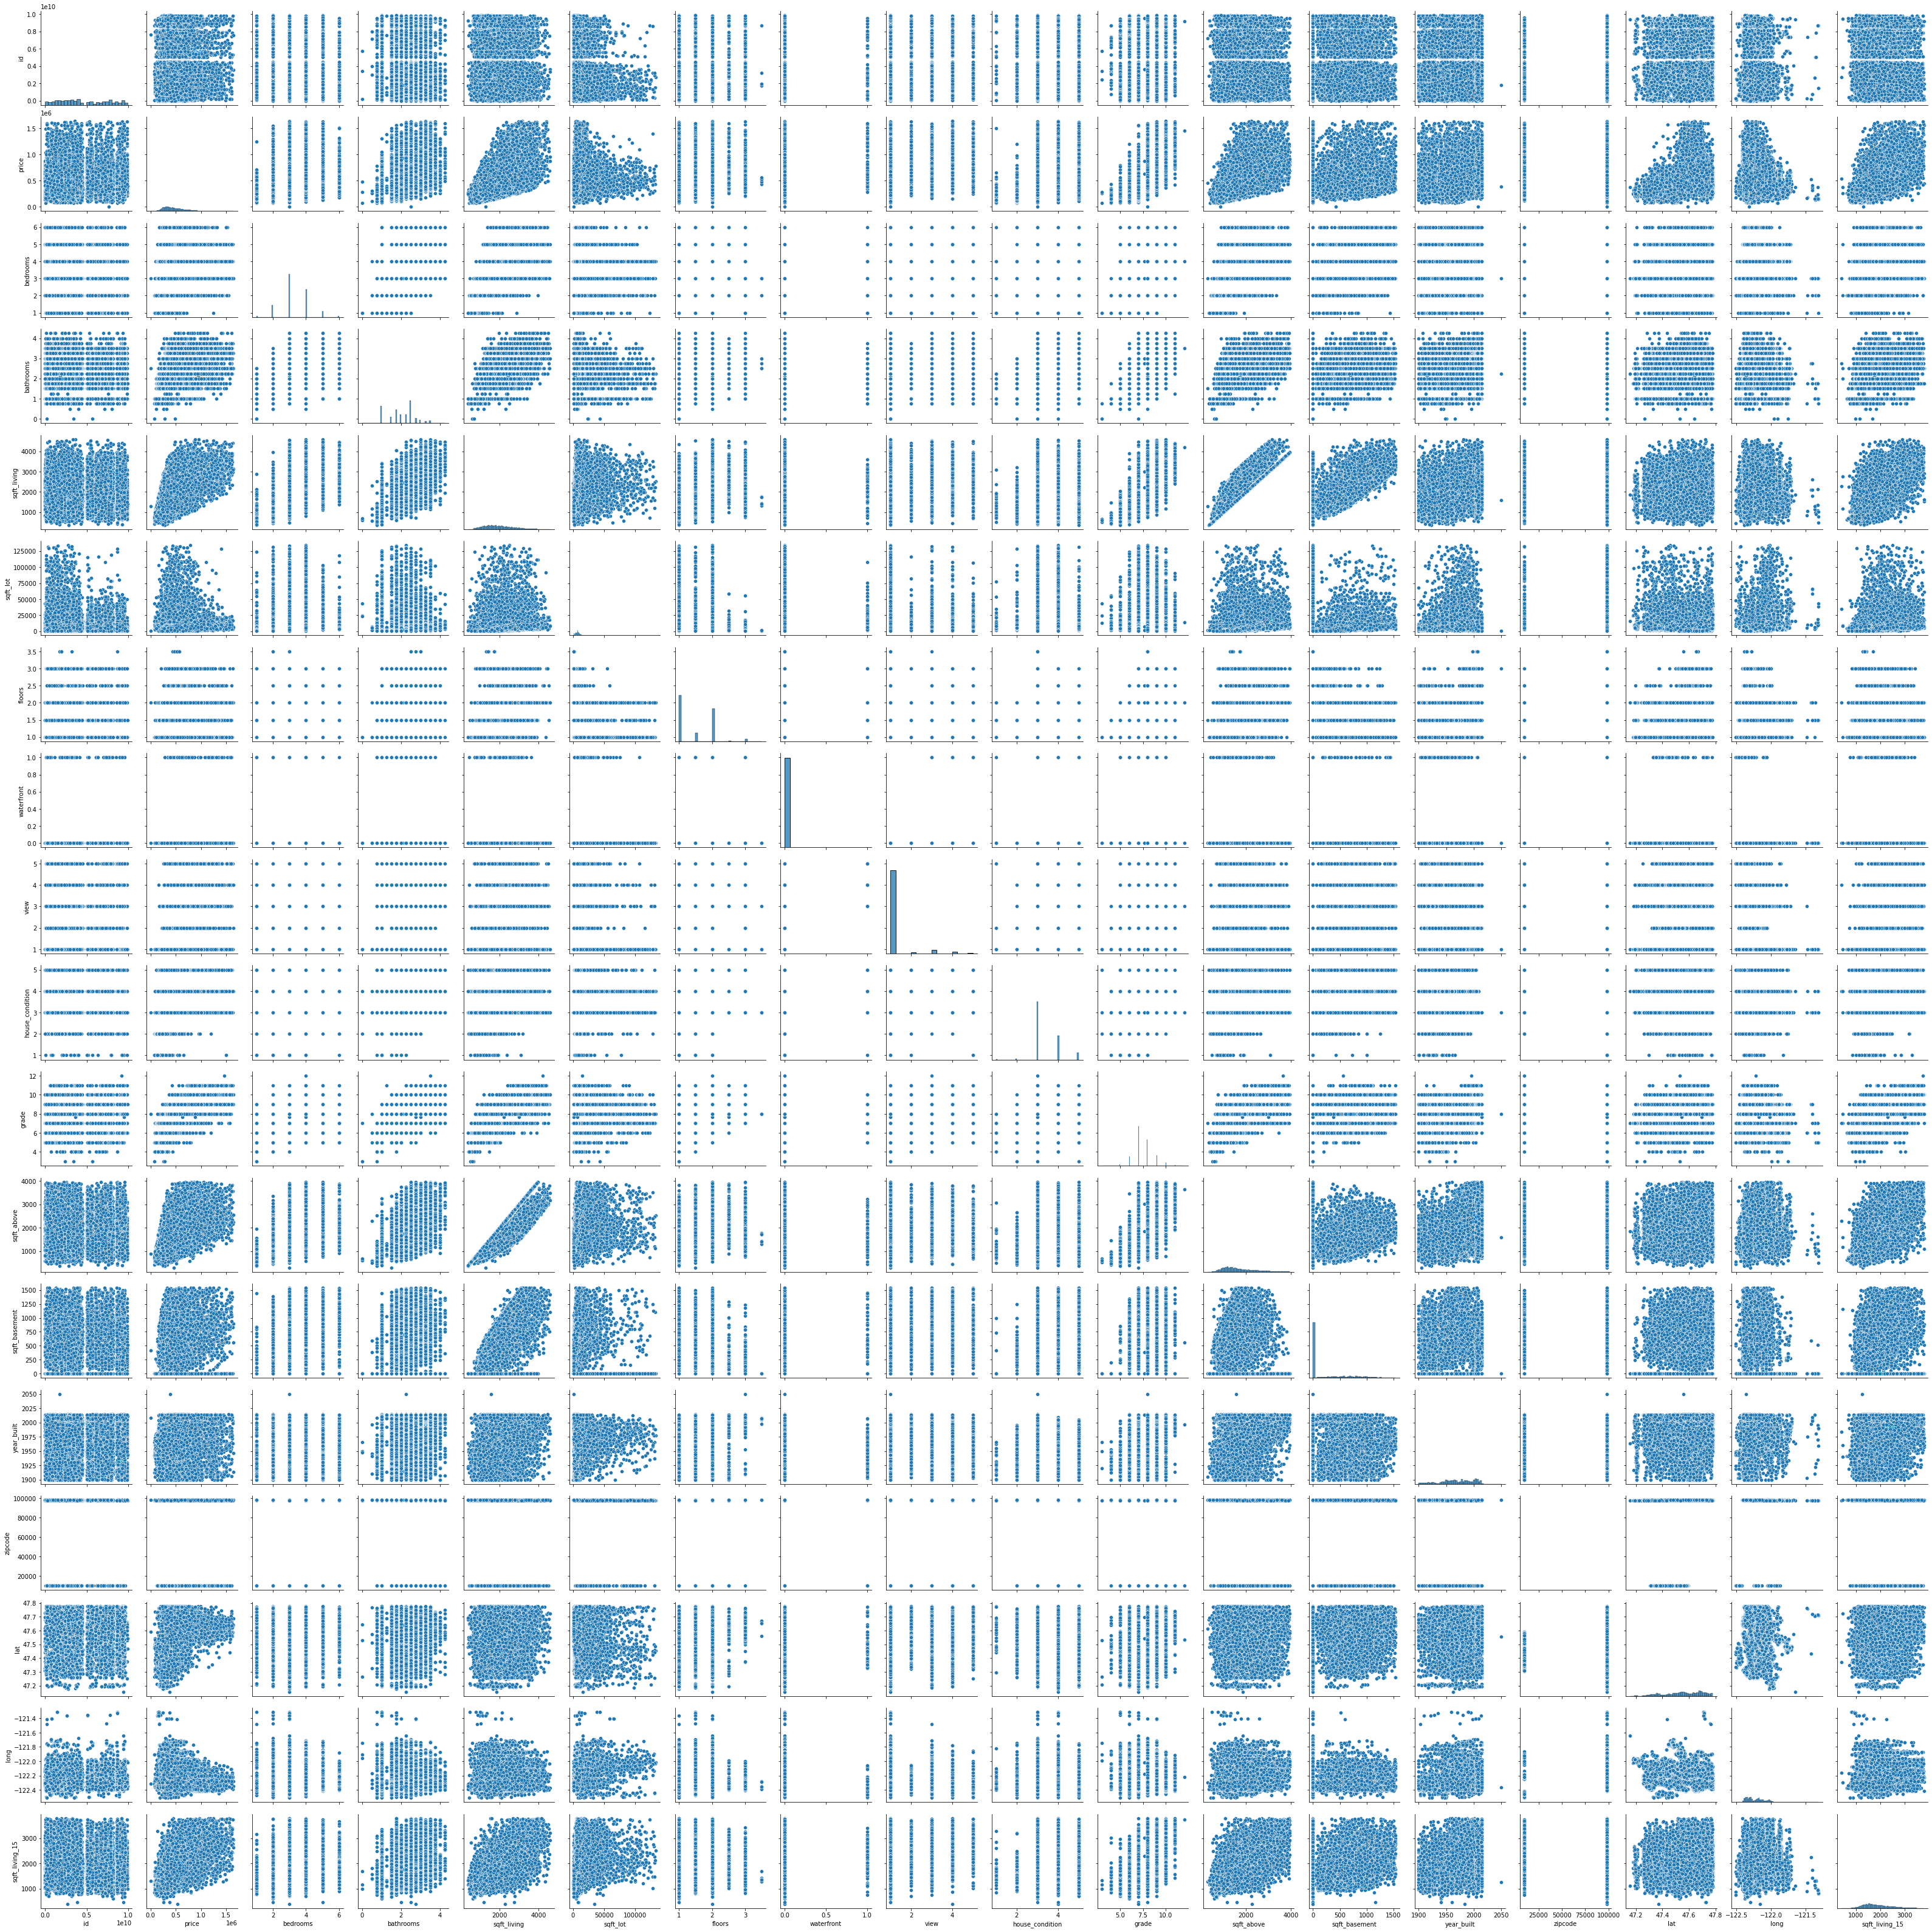

In [14]:
sns.pairplot(df)

### Step 3: Determine independent and dependent variable

In [15]:
# set X 
# Independent Variable: Grade
x1 = df['grade']
# set Y 
y = df['price']
# Dependent Variable: Price

In [16]:
# visualize relationship between X and Y

Text(0, 0.5, 'Price')

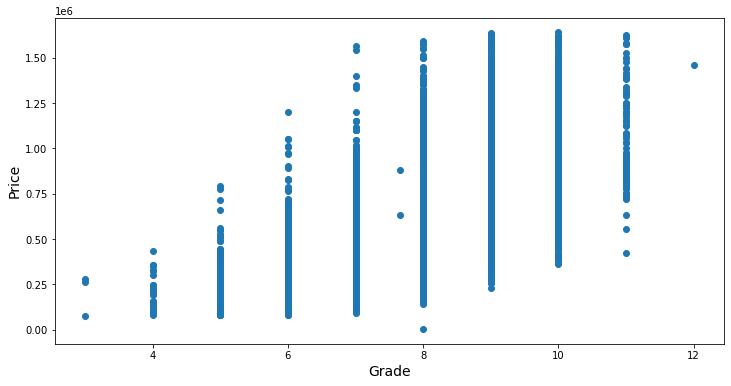

In [17]:
plt.figure(figsize=(12,6))
plt.scatter(x1,y)
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Price', fontsize=14)

### Step 4: Fit Regression 

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model and which statistical package is used for linear regression model.

In [18]:
# fit model to X and Y variables (you will need to make more cells)
import statsmodels.api as sm

In [19]:
x = sm.add_constant(x1)

In [20]:
results = sm.OLS(y,x).fit()

In [21]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                 1.320e+04
Date:                Wed, 12 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:06:25   Log-Likelihood:            -2.7734e+05
No. Observations:               20456   AIC:                         5.547e+05
Df Residuals:                   20454   BIC:                         5.547e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.128e+05   9656.207    -63.458      0.000   -6.32e+05   -5.94e+05
grade       1.463e+05   1273.221    114.881      0.000    1.44e+05    1.49e+05
==============================================================================
Omnibus:                     4321.528   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10536.323
Skew:                           1.173   Prob(JB):                         0.00
Kurtosis:                       5.618   Cond. No.                         57.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Step 5: Interpret Model Summary 

In [22]:
# print out and interpret model summary // terms identified below

Interpret the following from your model:

- R-squared: 0.392, Means that regression model does not observe variability well.
- Coefficient of independent variable: 1.4633+05, means that variables are correlated fairly strongly.
- P-value of T-statistic: 0.000, less than 0.05, which means it is statistically significant.
- P-value of F-statistic: 0.00, it is statistically significant.

### Step 6: Predict Values

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [38]:
# predict new y values (dependent variables) by feeding model new independent variable values
pred_df = pd.DataFrame({'constant':1, 'grade':[7, 5, 6]})
pred_df

constant  grade
0         1      7
1         1      5
2         1      6

In [39]:
predictions = results.predict(pred_df)
predictions

ValueError: shapes (3,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)

In [40]:
pred_df['price_prediction'] = results.predict(pred_df)
pred_df

ValueError: shapes (3,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)

# Part 3 - Multiple Linear Regression

### Step 1: From Data Exploration in Part 2, Pick Another Independent Variable 

In [26]:
# Pick another independent variable. Be sure to avoid multicollinearity. 
# I will choose year built as my other independent variable.

### Step 2: Fit A New Multiple Linear Regression Model to the New Independent Variables

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [27]:
# fit new regression model (you will need to make more cells)

In [28]:
x1 = df[['grade', 'year_built']]
y = df['price']

In [29]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [30]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     9731.
Date:                Wed, 12 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:06:25   Log-Likelihood:            -2.7559e+05
No. Observations:               20456   AIC:                         5.512e+05
Df Residuals:                   20453   BIC:                         5.512e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.724e+06   8.69e+04     54.341      0.000    4.55e+06    4.89e+06
grade       1.844e+05   1322.361    139.453      0.000    1.82e+05    1.87e+05
year_built -2854.5742     46.257    -61.711      0.000   -2945.242   -2763.907
==============================================================================
Omnibus:                     3849.866   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10127.733
Skew:                           1.025   Prob(JB):                         0.00
Kurtosis:                       5.771   Cond. No.                     1.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 3: Interpret Model Summary 

Print the output of the results summary from your model. Interpret the following parts of your results summary. Include an explanation of what the given numbers mean in regards to your model.
- R-squared: 0.488, means that the model does not observe variability particularly well.
- Adjusted R-squared: 0.488, there is no difference than r-squared, the model does not observe variability particulary well.
- Coefficient of independent variables: For grade, the coefficient is 1.844e+05, which means it is strongly correlated. For year built, it is -2854.57, which means it is very strongly not correlated.
- P-value of T-statistic: 0.00 for all, which means it is statistically significant.
- P-value of F-statistic: 0.00, which means it is statistically significant.



If you would like, continue to create new linear models as you add more than two independent variables. Notice the differences in the R-Squared values you get from each model. 

### Step 4: Predict Values

In [36]:
# predict new y values (dependent variables) by feeding model new independent variable values
pred_df = pd.DataFrame({'constant':1, 'grade':[7, 5, 6], 'year_built':[2000, 1985, 1945]})
pred_df

constant  grade  year_built
0         1      7        2000
1         1      5        1985
2         1      6        1945

In [37]:
pred_df['price_predictions'] = results.predict(pred_df)
pred_df

constant  grade  year_built  price_predictions
0         1      7        2000      305825.983470
1         1      5        1985      -20169.220128
2         1      6        1945      278420.658486

### Step 5: Report Observations in Difference Between Simple and Multiple Linear Regression Models You Made 

In [33]:
# create new markdown cell and write down your observations

In [34]:
# R squared value went up when year built variable was added. I had negative price predictions so there must have been some
# flaw in the models there. Year built was very negatively correlated with price. 

# Part 4 - Multivariate Time Series Analysis

In [35]:
# complete the time series analysis exercise separately from data-time-series folder

# Part 5 - Submit Project 